In [1]:
print('success')

In [2]:
import numpy as np
import matplotlib as mplt
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
import sklearn

In [4]:
df = sklearn.datasets.fetch_california_housing()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train_full , x_test , y_train_full , y_test = train_test_split(df.data , df.target  , random_state = 1)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full , random_state = 1)

In [7]:

print(x_train_full.shape)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(15480, 8)
(11610, 8)
(3870, 8)
(5160, 8)


In [8]:
np.random.seed(12)
tf.random.set_seed(12)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [10]:
x_train[1:3]

array([[-0.6668496 ,  1.30765859, -0.75388918, -0.1908919 , -0.98904153,
        -0.07214539,  0.89894016, -1.3604435 ],
       [-0.59639598, -0.12735788, -0.18261464, -0.21301746, -0.48096175,
        -0.0303978 ,  0.43025184,  0.07362032]])

In [11]:
from keras.models import Sequential
model = Sequential()
model.add(keras.layers.Dense(30 , activation="relu" ,input_shape=[8]))
model.add(keras.layers.Dense(30 , activation="relu" ))
model.add(keras.layers.Dense(1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mean_squared_error" , optimizer=keras.optimizers.SGD(lr=1e-3) , metrics=['mae'])

In [14]:
model_history = model.fit(x_train , y_train , epochs=30 , validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 2.7516 - mae: 1.2188 - val_loss: 1.1566 - val_mae: 0.8200
Epoch 2/30
363/363 [==============================] - 0s 789us/step - loss: 0.9361 - mae: 0.7296 - val_loss: 0.6800 - val_mae: 0.6385
Epoch 3/30
363/363 [==============================] - 0s 797us/step - loss: 0.6684 - mae: 0.6136 - val_loss: 0.5824 - val_mae: 0.5742
Epoch 4/30
363/363 [==============================] - 0s 805us/step - loss: 0.6047 - mae: 0.5731 - val_loss: 0.5505 - val_mae: 0.5478
Epoch 5/30
363/363 [==============================] - 0s 811us/step - loss: 0.5771 - mae: 0.5558 - val_loss: 0.5302 - val_mae: 0.5387
Epoch 6/30
363/363 [==============================] - 0s 764us/step - loss: 0.5554 - mae: 0.5448 - val_loss: 0.5146 - val_mae: 0.5256
Epoch 7/30
363/363 [==============================] - 0s 767us/step - loss: 0.5390 - mae: 0.5335 - val_loss: 0.5016 - val_mae: 0.5180
Epoch 8/30
363/363 [==============================] - 0s 791us/s

In [15]:
# 1 = 42 
# 2 = 38
# 3 = 36
# 4 = 34

In [16]:
model_evaluate = model.evaluate(x_test , y_test)

162/162 [==============================] - 0s 540us/step - loss: 0.5208 - mae: 0.5369


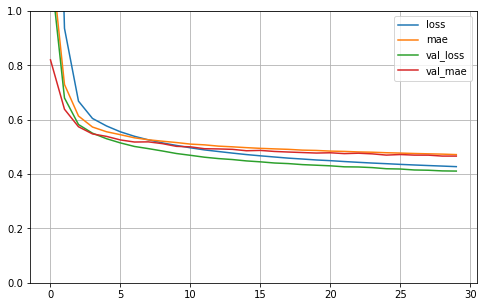

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [44]:
x_test_new = x_test[0][0]

In [45]:
x_test_new 

-0.308143570072583

In [46]:
n = 0
for i in range(0,8):
    num = i
    x_test_new = x_test[0][num]
    print(n , x_test_new)
    n = n + 1

0 -0.308143570072583
1 0.8116151598274279
2 -0.40665842466904356
3 -0.04991734962563992
4 -0.2736828625074234
5 -1.0830400382730607
6 -0.7343671005025372
7 0.5976560727008126


In [47]:
x_test_new_1 = x_test[0]

In [48]:
x_test_new_1

array([-0.30814357,  0.81161516, -0.40665842, -0.04991735, -0.27368286,
       -1.08304004, -0.7343671 ,  0.59765607])

In [49]:
excpetted_output= y_test[0]

In [51]:
excpetted_output

3.55